### All we need is to ensure that our model evaluation output of all loaders are the same so that we could easily compare the models. Currenlty we do not have any proper models, this is quite the problem you see. 

### Should we iterate over the indexes - yes. We can compare the RNN and FNN - with the FNN. So many different things we wanted to plug.

In [1]:
import pandas as pd
import numpy as np
from torch.utils.data import Dataset
import logging as log
from utils.preprocessing import Shaper, MinMaxScaler, minmax_scale
from utils.configs import BaseConf

In [2]:
import unittest
# from datasets.flat_dataset import FlatDataset
from utils.preprocessing import Shaper
from utils.mock_data import generate_mock_data
import numpy as np

# Todo `AUC` over time and if re-training is needed

# Sequenced RNN

In [7]:

# data_dim_strs = [
#     "T12H-X850M-Y880M/",
#     "T1H-X1700M-Y1760M/",
#     "T24H-X425M-Y440M/",
#     "T24H-X850M-Y880M/",
#     "T24H-X85M-Y110M/",
#     "T3H-X850M-Y880M/",
#     "T4H-X850M-Y880M/",
#     "T6H-X850M-Y880M/"
# ]

data_dim_strs = os.listdir("./data/processed")[1:]
pprint(data_dim_strs)

['T6H-X850M-Y880M',
 'T24H-X85M-Y110M',
 'T24H-X850M-Y880M',
 'T24H-X425M-Y440M',
 'T12H-X850M-Y880M',
 'T1H-X1700M-Y1760M',
 'T3H-X850M-Y880M']


In [ ]:
for data_dim_str in data_dim_strs:
    print(data_dim_str)
    data_path = f"./data/processed/{data_dim_str}/"
    zip_file = np.load(data_path + "generated_data.npz")

    # print info on the read data
    log.info("Data shapes of files in generated_data.npz")
    for k in zip_file.keys():
        try:
            v = zip_file[k]
            print(f"\t{k} shape {np.shape(v)}")
        except ValueError as e:
            print(f"Issue loading {k} ->{e}")
            
        
    t_range = pd.read_pickle(data_path + "t_range.pkl")
    print(f"\tt_range shape {np.shape(t_range)}")

T6H-X850M-Y880M
	crime_feature_indices shape (11,)
	crime_types_grids shape (1460, 11, 47, 33)
	crime_grids shape (1460, 1, 47, 33)
	demog_grid shape (1, 37, 47, 33)
	street_grid shape (1, 512, 47, 33)
	time_vectors shape (1461, 46)
	weather_vectors shape (1460, 11)
	x_range shape (33,)
	y_range shape (47,)
	t_range shape (1461,)
T24H-X85M-Y110M
	crime_feature_indices shape (11,)


In [8]:
for k in zip_file.keys():
    print(k)

NameError: name 'zip_file' is not defined

In [9]:
data_dim_str = "T24H-X850M-Y880M"
data_path = f"./data/processed/{data_dim_str}/"


conf_dict = {
    "seed": 3,
    "resume": False,
    "early_stopping": False,
    "use_cuda": False,
    "val_ratio": 0.1,
    "tst_ratio": 0.2,
    "sub_sample_train_set": True,
    "sub_sample_validation_set": True,
    "sub_sample_test_set": False,
    "flatten_grid": True,
    "lr": 1e-3,
    "weight_decay": 1e-8,
    "max_epochs": 10,
    "batch_size": 64,
    "dropout": 0,
    "shuffle": False,
    "num_workers": 6,
    "seq_len": 0,
    "top_k_cells": 20,
    "use_top_k_cells": False,
}


conf = BaseConf(conf_dict=conf_dict)

data_group = FlatDataGroup(data_path=data_path, conf=conf)

In [10]:
test_set = data_group.testing_set
# get evaluation of each time step - like evaluate sub-test sets per time and see if the actual accuracy dies off.



In [11]:
test_set.targets.shape,test_set.crimes.shape

((72, 1, 763), (72, 11, 763))

In [12]:
test_set.targets.shape

(72, 1, 763)

# Try simple crime info only training loop
### Check other training loops - already have good examples with checkpointing set up

## Useful plotting - when it comes to the per cell level predictions
## TODO: add cell index sorting to the dataset/datagroup

In [1]:
og_crimes = data_group.crime_scaler.inverse_transform(data_group.crimes)
og_crimes = np.exp2(og_crimes) - 1

NameError: name 'data_group' is not defined

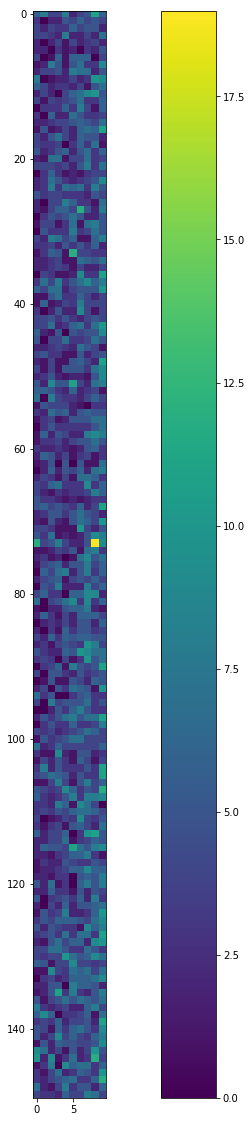

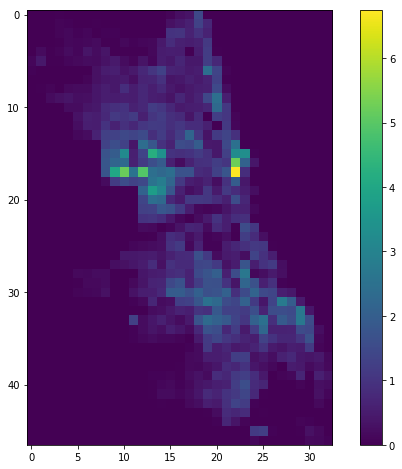

In [12]:
top_k = 10
last_n_steps = 150
crimes = og_crimes[:,0]
s = data_group.shaper.squeeze(crimes)
indices = np.argsort(s.mean(0))
sorted_s = s[:last_n_steps,indices[-top_k:]]
plt.figure(figsize=(20,20))
plt.imshow(sorted_s,cmap='viridis')
plt.colorbar()
plt.show()

im(crimes.mean(0))

In [1]:
for i in range(2):
    data = sorted_s[:,-(i+1)]
    ones = np.copy(data)
    ones[ones == -1]
    mean = np.ones_like(data)*np.mean(data)
    cell_plotter = CellPlotter("test")
    cell_plotter.plot_predictions(y_true=[1,0,0,1,0,0,1,0,0,1],
                                  y_pred=None,[0,1,0,0,1,0,1,0,0,1],
                                  probas_pred=[.1,.01,.06,.6,0,.3,.8,0,0,.1])
    cell_plotter.show()

NameError: name 'sorted_s' is not defined